In [1]:
import urllib.request

In [2]:
url = 'http://maps.latimes.com/neighborhoods/neighborhood/list/'
page = urllib.request.urlopen(url)

In [3]:
!pip install BeautifulSoup4
from bs4 import BeautifulSoup

In [4]:
soup = BeautifulSoup(page, 'html.parser')

In [66]:
all_tables = soup.find_all('table')

In [6]:
data = soup.find('table',class_="datagrid")

In [67]:
Region = []
Neigh = []

for row in data.findAll('tr'):
    cells=row.findAll('a')
    if len(cells)==2:
        Neigh.append(cells[0].find(text=True)[:])
        Region.append(cells[1].find(text=True)[:])


# Create data frame

In [8]:
import pandas as pd
import numpy as np

In [9]:
columns = ['Neighborhood','Region']
df = pd.DataFrame(columns = columns)


In [10]:
df['Neighborhood']=Neigh
df['Region']=Region
df

,Neighborhood,Region
0,Acton,Antelope Valley
1,Adams-Normandie,South L.A.
2,Agoura Hills,Santa Monica Mountains
3,Agua Dulce,Northwest County
4,Alhambra,San Gabriel Valley
...,...,...
267,Willowbrook,South L.A.
268,Wilmington,Harbor
269,Windsor Square,Central L.A.
270,Winnetka,San Fernando Valley


In [68]:
#missing = df.isnull()
#for column in missing.columns.values.tolist():
#   print(missing[column].value_counts)

### import the other data file that contains housing price and coordinates

In [12]:
cor=pd.read_csv('https://usc.data.socrata.com/api/views/4a97-v5tx/rows.csv?accessType=DOWNLOAD')

In [13]:
cor.head()

,Policy Area,Dataset,Variable,Year,Amount,Tract,Tract Number,Neighborhood,GEOID,Location,Row ID,Date
0,Housing & Real Estate,Rent Price,Median Rent Price,2015,1115.0,"Census Tract 9200.23, Los Angeles County, Cali...",920023,Santa Clarita,1400000US06037920023,"(34.4214975, -118.4905135)",Median_Rent_Price_2015_1400000US06037920023,01/01/2015
1,Housing & Real Estate,Rent Price,Median Rent Price,2015,1038.0,"Census Tract 5344.04, Los Angeles County, Cali...",534404,Cudahy,1400000US06037534404,"(33.966232, -118.190553)",Median_Rent_Price_2015_1400000US06037534404,01/01/2015
2,Housing & Real Estate,Rent Price,Median Rent Price,2015,1031.0,"Census Tract 5336.01, Los Angeles County, Cali...",533601,Bell,1400000US06037533601,"(33.9803325, -118.194495)",Median_Rent_Price_2015_1400000US06037533601,01/01/2015
3,Housing & Real Estate,Rent Price,Median Rent Price,2015,1362.0,"Census Tract 4053.02, Los Angeles County, Cali...",405302,West Covina,1400000US06037405302,"(34.0767645, -117.946434)",Median_Rent_Price_2015_1400000US06037405302,01/01/2015
4,Housing & Real Estate,Rent Price,Median Rent Price,2015,919.0,"Census Tract 2042, Los Angeles County, California",204200,Boyle Heights,1400000US06037204200,"(34.043615, -118.205084)",Median_Rent_Price_2015_1400000US06037204200,01/01/2015


In [14]:
price = cor[['Neighborhood','Location','Amount']]
price.head()

,Neighborhood,Location,Amount
0,Santa Clarita,"(34.4214975, -118.4905135)",1115.0
1,Cudahy,"(33.966232, -118.190553)",1038.0
2,Bell,"(33.9803325, -118.194495)",1031.0
3,West Covina,"(34.0767645, -117.946434)",1362.0
4,Boyle Heights,"(34.043615, -118.205084)",919.0


In [15]:
price.shape

(16390, 3)

In [16]:
price['Location'].describe

<bound method NDFrame.describe of 0        (34.4214975, -118.4905135)
1          (33.966232, -118.190553)
2         (33.9803325, -118.194495)
3         (34.0767645, -117.946434)
4          (34.043615, -118.205084)
                    ...            
16385     (34.047759, -118.1144605)
16386     (33.786226, -118.1763345)
16387     (33.9857845, -118.277227)
16388       (33.85597, -118.067815)
16389     (34.069656, -118.2780295)
Name: Location, Length: 16390, dtype: object>

In [17]:
price['Location']=price['Location'].str.strip('()')
price[['Latitude','Longitude']]=price['Location'].str.split(',',expand=True)
price.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Neighborhood,Location,Amount,Latitude,Longitude
0,Santa Clarita,"34.4214975, -118.4905135",1115.0,34.4214975,-118.4905135
1,Cudahy,"33.966232, -118.190553",1038.0,33.966232,-118.190553
2,Bell,"33.9803325, -118.194495",1031.0,33.9803325,-118.194495
3,West Covina,"34.0767645, -117.946434",1362.0,34.0767645,-117.946434
4,Boyle Heights,"34.043615, -118.205084",919.0,34.043615,-118.205084


In [18]:
price.shape

(16390, 5)

In [19]:
la_data= pd.merge(price,df,on='Neighborhood')

In [20]:
la_data.drop(columns='Location',inplace=True)

In [21]:
#la_data['Amount'].replace('Nan',np.nan,inplace=True)
#la_data.dropna(subset=['Amount'],axis=0,inplace=True)

In [22]:
la_data

,Neighborhood,Amount,Latitude,Longitude,Region
0,Santa Clarita,1115.0,34.4214975,-118.4905135,Northwest County
1,Santa Clarita,2076.0,34.443157,-118.516583,Northwest County
2,Santa Clarita,1842.0,34.435109,-118.538718,Northwest County
3,Santa Clarita,1941.0,34.4718625,-118.527824,Northwest County
4,Santa Clarita,1412.0,34.3872515,-118.5594415,Northwest County
...,...,...,...,...,...
16357,Hansen Dam,NaN,34.2656655,-118.368858,San Fernando Valley
16358,Hansen Dam,NaN,34.2656655,-118.368858,San Fernando Valley
16359,Hansen Dam,NaN,34.2656655,-118.368858,San Fernando Valley
16360,Hansen Dam,NaN,34.2656655,-118.368858,San Fernando Valley


In [23]:
la_data.groupby('Neighborhood').count()

,Amount,Latitude,Longitude,Region
Neighborhood,,,,
Acton,12,14,14,14
Adams-Normandie,35,35,35,35
Agoura Hills,20,20,20,20
Agua Dulce,5,6,6,6
Alhambra,140,140,140,140
...,...,...,...,...
Willowbrook,42,42,42,42
Wilmington,107,112,112,112
Windsor Square,14,14,14,14


In [24]:
la_data['Latitude'].dtype #latitude and longitude has data type 'object'

dtype('O')

In [25]:
la_data['Latitude']=pd.to_numeric(la_data["Latitude"], downcast="float")
la_data['Longitude']=pd.to_numeric(la_data["Longitude"], downcast="float")

In [26]:
Region=la_data.groupby('Region').mean()
Region.sort_values(by="Amount",ascending=False,inplace=True)
Region

,Amount,Latitude,Longitude
Region,,,
Santa Monica Mountains,2087.795455,34.114437,-118.731850
Westside,1682.574713,34.033661,-118.442993
Northwest County,1617.348837,34.444237,-118.514305
South Bay,1468.751945,33.885574,-118.358116
Angeles Forest,1450.782609,34.318268,-118.174553
Verdugos,1438.559451,34.175274,-118.204735
San Fernando Valley,1415.673955,34.213909,-118.467018
San Gabriel Valley,1383.309059,34.066647,-117.986832
Pomona Valley,1310.161812,34.077179,-117.753807


In [27]:
Region_avg_price=Region.drop(['Latitude','Longitude'],axis=1)
Region_avg_price

,Amount
Region,
Santa Monica Mountains,2087.795455
Westside,1682.574713
Northwest County,1617.348837
South Bay,1468.751945
Angeles Forest,1450.782609
Verdugos,1438.559451
San Fernando Valley,1415.673955
San Gabriel Valley,1383.309059
Pomona Valley,1310.161812


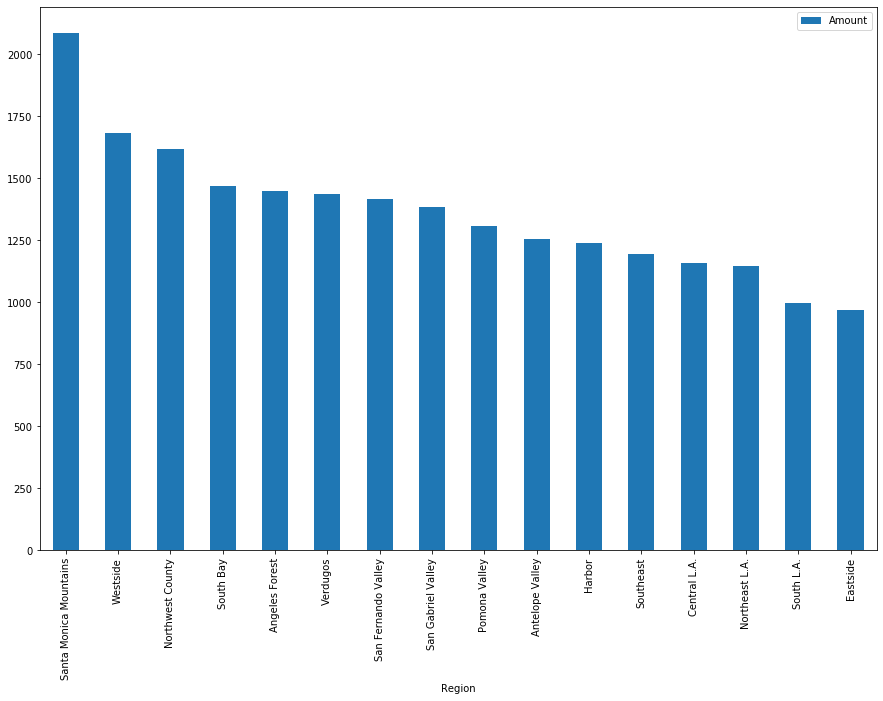

In [28]:
# bar chart
Region_avg_price.plot(kind='bar',figsize=(15,10))

In [29]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

# All requested packages already installed.

Folium installed and imported!


In [30]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

Solving environment: done

# All requested packages already installed.



In [31]:
address = 'Los Angeles'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of LA are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of LA are 34.0536909, -118.2427666.


In [32]:
LA_map = folium.Map(location=[34.0536909, -118.2427666], zoom_start=10)
LA_map

In [33]:
#pd.options.display.float_format = '{:,.2f}'.format
Region['Rent']=Region['Amount'].map('${:.2f}'.format)
Region

,Amount,Latitude,Longitude,Rent
Region,,,,
Santa Monica Mountains,2087.795455,34.114437,-118.731850,$2087.80
Westside,1682.574713,34.033661,-118.442993,$1682.57
Northwest County,1617.348837,34.444237,-118.514305,$1617.35
South Bay,1468.751945,33.885574,-118.358116,$1468.75
Angeles Forest,1450.782609,34.318268,-118.174553,$1450.78
Verdugos,1438.559451,34.175274,-118.204735,$1438.56
San Fernando Valley,1415.673955,34.213909,-118.467018,$1415.67
San Gabriel Valley,1383.309059,34.066647,-117.986832,$1383.31
Pomona Valley,1310.161812,34.077179,-117.753807,$1310.16


In [34]:
!wget --quiet "http://boundaries.latimes.com/1.0/boundary-set/la-county-regions-v6/?format=geojson"

In [35]:
la='index.html?format=geojson'

In [36]:
Region.reset_index(inplace=True)

In [37]:
LA_map.choropleth(
    geo_data= la,
    data = Region,
    columns = ['Region','Amount'],
    key_on='feature.properties.name',
    fill_color = 'PuBu',
    fill_opacity = 0.5,
    line_opacity=0.4,
    legend_name='Average rent amount in LA'
)
LA_map

In [38]:
for lat, lng, label,reg in zip(Region.Latitude, Region.Longitude, Region.Rent,Region.Region):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='green',
        fill=True,
        popup=reg+'<br>avg rent: '+label,
        fill_color='white',
        fill_opacity=0.8
    ).add_to(LA_map)
LA_map

## Characteristics of Regions

In [39]:
import requests

In [40]:
CLIENT_ID = 'QKX3W2CXK321SOGKK5IU1UXMMRRSXJFH0UHAABCPR4ZFGRXH' 
CLIENT_SECRET = '15PNW2H2MJR4OBJFVGNVRBHAAGY5GLCQSPZPE40VTWVGAXCT' 
VERSION = '20180605'

In [47]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Region', 
                  'Region Latitude', 
                  'Region Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [49]:
LIMIT=100
LA_venues = getNearbyVenues(names=Region['Region'],
                                   latitudes=Region['Latitude'],
                                   longitudes=Region['Longitude']
                                  )

Santa Monica Mountains
Westside
Northwest County
South Bay
Angeles Forest
Verdugos
San Fernando Valley
San Gabriel Valley
Pomona Valley
Antelope Valley
Harbor
Southeast
Central L.A.
Northeast L.A.
South L.A.
Eastside


In [50]:
print(LA_venues.shape)
LA_venues.head()

(127, 7)


,Region,Region Latitude,Region Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Westside,34.033661,-118.442993,Top Tier Treats,34.033263,-118.442879,Bakery
1,Westside,34.033661,-118.442993,Cheng Du,34.032923,-118.442713,Chinese Restaurant
2,Westside,34.033661,-118.442993,San Francisco Saloon,34.033299,-118.442598,Dive Bar
3,Westside,34.033661,-118.442993,Mori Sushi,34.033407,-118.442133,Japanese Restaurant
4,Westside,34.033661,-118.442993,West LA Animal Shelter,34.034690,-118.440306,Government Building


In [51]:
LA_onehot = pd.get_dummies(LA_venues[['Venue Category']], prefix="", prefix_sep="")

LA_onehot['Region'] = LA_venues['Region'] 

# move Region column to the first column
fixed_columns = [LA_onehot.columns[-1]] + list(LA_onehot.columns[:-1])
LA_onehot = LA_onehot[fixed_columns]

LA_onehot.head()

,Region,American Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beer Garden,Breakfast Spot,Burger Joint,...,Steakhouse,Supermarket,Sushi Restaurant,Tanning Salon,Thai Restaurant,Tree,Video Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Westside,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Westside,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Westside,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Westside,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Westside,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
LA_grouped = LA_onehot.groupby('Region').mean().reset_index()
LA_grouped

,Region,American Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beer Garden,Breakfast Spot,Burger Joint,...,Steakhouse,Supermarket,Sushi Restaurant,Tanning Salon,Thai Restaurant,Tree,Video Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Central L.A.,0.000000,0.000000,0.0,0.029412,0.029412,0.029412,0.029412,0.000000,0.0,...,0.00,0.029412,0.029412,0.000000,0.029412,0.0,0.000000,0.029412,0.000000,0.00
1,Eastside,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.00,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.00
2,Harbor,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00
3,Northeast L.A.,0.000000,0.142857,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00
4,Northwest County,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.083333,0.0,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.083333,0.000000,0.000000,0.00
5,Pomona Valley,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00
6,San Fernando Valley,0.000000,0.000000,0.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00
7,San Gabriel Valley,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00
8,South Bay,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.00,0.000000,0.000000,0.066667,0.000000,0.0,0.000000,0.000000,0.000000,0.00
9,South L.A.,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.333333,0.00


In [53]:
num_top_venues = 5

for hood in LA_grouped['Region']:
    print("----"+hood+"----")
    temp = LA_grouped[LA_grouped['Region'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Central L.A.----
                  venue  freq
0     Korean Restaurant  0.26
1           Coffee Shop  0.09
2          Cocktail Bar  0.06
3        Sandwich Place  0.03
4  Gym / Fitness Center  0.03


----Eastside----
                 venue  freq
0                 Tree   1.0
1  American Restaurant   0.0
2   Mexican Restaurant   0.0
3  Peruvian Restaurant   0.0
4          Pastry Shop   0.0


----Harbor----
                     venue  freq
0  Health & Beauty Service  0.33
1        Convenience Store  0.33
2       Chinese Restaurant  0.33
3      American Restaurant  0.00
4             Noodle House  0.00


----Northeast L.A.----
                venue  freq
0          Playground  0.14
1      Scenic Lookout  0.14
2        Liquor Store  0.14
3  Mexican Restaurant  0.14
4             Dog Run  0.14


----Northwest County----
                       venue  freq
0         Mexican Restaurant  0.17
1  Middle Eastern Restaurant  0.08
2                Video Store  0.08
3         Salon / Barbershop  0

In [54]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [55]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Region']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Regions_venues_sorted = pd.DataFrame(columns=columns)
Regions_venues_sorted['Region'] = LA_grouped['Region']

for ind in np.arange(LA_grouped.shape[0]):
    Regions_venues_sorted.iloc[ind, 1:] = return_most_common_venues(LA_grouped.iloc[ind, :], num_top_venues)

Regions_venues_sorted.head()

,Region,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central L.A.,Korean Restaurant,Coffee Shop,Cocktail Bar,Chinese Restaurant,Seafood Restaurant,Mexican Restaurant,Dumpling Restaurant,Juice Bar,Pizza Place,Ramen Restaurant
1,Eastside,Tree,Yoga Studio,Food,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant
2,Harbor,Health & Beauty Service,Convenience Store,Chinese Restaurant,Yoga Studio,Food,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant
3,Northeast L.A.,BBQ Joint,Dog Run,Convenience Store,Playground,Liquor Store,Mexican Restaurant,Scenic Lookout,Yoga Studio,Electronics Store,Donut Shop
4,Northwest County,Mexican Restaurant,Coffee Shop,Breakfast Spot,Middle Eastern Restaurant,Pharmacy,Massage Studio,Salon / Barbershop,Sandwich Place,Shopping Mall,Video Store


In [56]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [57]:
kclusters = 5

LA_grouped_clustering = LA_grouped.drop('Region', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(LA_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 2, 0, 0, 3, 0, 0, 0, 4], dtype=int32)

In [58]:
Regions_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

LA_merged = Region

# merge toronto_grouped with toronto_data to add latitude/longitude for each Region
LA_merged = LA_merged.join(Regions_venues_sorted.set_index('Region'), on='Region')

In [59]:
LA_merged.dropna(subset=['Cluster Labels'],axis=0,inplace=True)

LA_merged.head()

,Region,Amount,Latitude,Longitude,Rent,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Westside,1682.574713,34.033661,-118.442993,$1682.57,0.0,Mexican Restaurant,Japanese Restaurant,Yoga Studio,Pharmacy,Movie Theater,Liquor Store,Indian Restaurant,Health & Beauty Service,Gym,Government Building
2,Northwest County,1617.348837,34.444237,-118.514305,$1617.35,0.0,Mexican Restaurant,Coffee Shop,Breakfast Spot,Middle Eastern Restaurant,Pharmacy,Massage Studio,Salon / Barbershop,Sandwich Place,Shopping Mall,Video Store
3,South Bay,1468.751945,33.885574,-118.358116,$1468.75,0.0,Mexican Restaurant,Cuban Restaurant,Smoke Shop,Noodle House,Mediterranean Restaurant,Donut Shop,Martial Arts Dojo,Sandwich Place,Market,Liquor Store
6,San Fernando Valley,1415.673955,34.213909,-118.467018,$1415.67,0.0,Peruvian Restaurant,Intersection,Bagel Shop,Cosmetics Shop,Marijuana Dispensary,Fast Food Restaurant,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant
7,San Gabriel Valley,1383.309059,34.066647,-117.986832,$1383.31,0.0,Paper / Office Supplies Store,Optical Shop,Convenience Store,Coffee Shop,Food,Yoga Studio,Electronics Store,Dog Run,Donut Shop,Dumpling Restaurant


In [60]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,rent in zip(LA_merged['Latitude'], LA_merged['Longitude'], LA_merged['Region'], LA_merged['Cluster Labels'],LA_merged['Rent']):
    #label = folium.Popup(str(poi)+'avg rent: '+str(rent)+ ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=str(poi)+'<br>avg rent: '+str(rent)+ '<br>Cluster ' + str(cluster),
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(LA_map)
       
LA_map

In [61]:
LA_merged.loc[LA_merged['Cluster Labels'] == 0, LA_merged.columns[[0] + list(range(5, LA_merged.shape[1]))]]

,Region,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Westside,0.0,Mexican Restaurant,Japanese Restaurant,Yoga Studio,Pharmacy,Movie Theater,Liquor Store,Indian Restaurant,Health & Beauty Service,Gym,Government Building
2,Northwest County,0.0,Mexican Restaurant,Coffee Shop,Breakfast Spot,Middle Eastern Restaurant,Pharmacy,Massage Studio,Salon / Barbershop,Sandwich Place,Shopping Mall,Video Store
3,South Bay,0.0,Mexican Restaurant,Cuban Restaurant,Smoke Shop,Noodle House,Mediterranean Restaurant,Donut Shop,Martial Arts Dojo,Sandwich Place,Market,Liquor Store
6,San Fernando Valley,0.0,Peruvian Restaurant,Intersection,Bagel Shop,Cosmetics Shop,Marijuana Dispensary,Fast Food Restaurant,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant
7,San Gabriel Valley,0.0,Paper / Office Supplies Store,Optical Shop,Convenience Store,Coffee Shop,Food,Yoga Studio,Electronics Store,Dog Run,Donut Shop,Dumpling Restaurant
11,Southeast,0.0,Convenience Store,Discount Store,Doctor's Office,Mexican Restaurant,Sandwich Place,Seafood Restaurant,Fast Food Restaurant,Burger Joint,Sushi Restaurant,Gym
12,Central L.A.,0.0,Korean Restaurant,Coffee Shop,Cocktail Bar,Chinese Restaurant,Seafood Restaurant,Mexican Restaurant,Dumpling Restaurant,Juice Bar,Pizza Place,Ramen Restaurant
13,Northeast L.A.,0.0,BBQ Joint,Dog Run,Convenience Store,Playground,Liquor Store,Mexican Restaurant,Scenic Lookout,Yoga Studio,Electronics Store,Donut Shop


In [62]:
LA_merged.loc[LA_merged['Cluster Labels'] == 1, LA_merged.columns[[0] + list(range(5, LA_merged.shape[1]))]]

,Region,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Eastside,1.0,Tree,Yoga Studio,Food,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant


In [63]:
LA_merged.loc[LA_merged['Cluster Labels'] == 2, LA_merged.columns[[0] + list(range(5, LA_merged.shape[1]))]]

,Region,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Harbor,2.0,Health & Beauty Service,Convenience Store,Chinese Restaurant,Yoga Studio,Food,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant


In [64]:
LA_merged.loc[LA_merged['Cluster Labels'] == 3, LA_merged.columns[[0] + list(range(5, LA_merged.shape[1]))]]

,Region,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Pomona Valley,3.0,Pharmacy,Pizza Place,Grocery Store,Gas Station,Chinese Restaurant,Electronics Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop


In [65]:
LA_merged.loc[LA_merged['Cluster Labels'] == 4, LA_merged.columns[[0] + list(range(5, LA_merged.shape[1]))]]

,Region,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,South L.A.,4.0,American Restaurant,Check Cashing Service,Wine Bar,Health & Beauty Service,Gym / Fitness Center,Gym,Grocery Store,Government Building,Gas Station,Dive Bar
